In [102]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
%matplotlib inline
import scipy as sp
import numpy as np
# sometimes order maters on these
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import oBehave.plotting_stuff as obps
import oBehave.helperfunctions as obhf
import sklearn.decomposition as decomp

from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
from visual_behavior.ophys.response_analysis.utilities import get_trace_around_timepoint,get_nearest_frame
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

experiment_id = 639438856

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
# Load a particular neuron
manifest = obhf.load_manifest()
dataset= VisualBehaviorOphysDataset(experiment_id=experiment_id, cache_dir=obhf.drive_path)
respset = ResponseAnalysis(dataset)

loading trial response dataframe
loading flash response dataframe


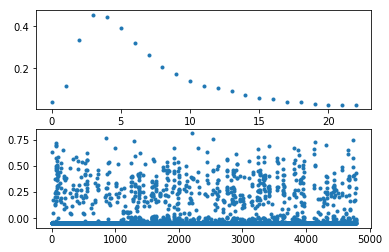

In [123]:
stimulus_table = dataset.stimulus_table
evt = obhf.load_dff_events_file(experiment_id)
dff = dataset.dff_traces
tme = dataset.timestamps_ophys
X = obps.dffBlockPlot(dff[19,:],tme,stimulus_table['start_time'].values,window=(0,.75),plotme = False);
Xe = obps.dffBlockPlot(evt[19,:],tme,stimulus_table['start_time'].values,window=(0,.75),plotme = False);
pca = decomp.PCA()
a = pca.fit_transform(X)
pca2 = decomp.PCA()
b  =pca2.fit_transform(Xe)
fig = plt.figure()
axes = fig.subplots(2,1)
axes[0].plot(pca.components_[0,:],'.')
#axes[0].hist()
axes[1].plot(b[:,0],'.')


In [61]:
pca.components_.shape
unique_image = np.unique(stimulus_table['image_name'])
for ii, image in enumerate(unique_image):
    usepts = stimulus_table['image_name']==image
    #plt.plot(pca.components_[0,usepts],pca.components_[1,usepts],'.')
    plt.plot(stimulus_table[stimulus_table.image_name==image]['flash_number'],
             pca.components_[0,usepts],'.')
axes = plt.figure().subplots(1,2)
axes[0].plot(pca.explained_variance_ratio_,'.')
axes[1].plot(pca.fit_transform_[])

SyntaxError: invalid syntax (<ipython-input-61-b96edbeaecda>, line 12)

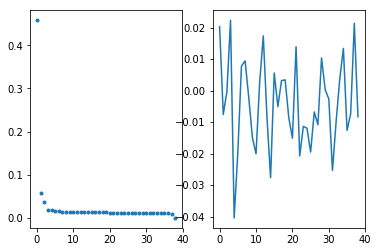

In [55]:
axes = plt.figure().subplots(1,2)
axes[0].plot(pca.explained_variance_ratio_,'.')
axes[1].plot(pca.components_[:,-1])

0.5052484507753936

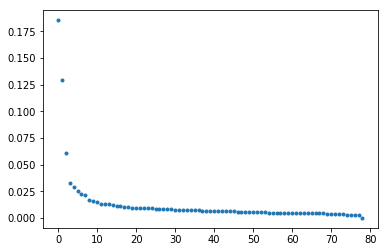

In [47]:
evt = obhf.load_dff_events_file(experiment_id)
pca2 = decomp.PCA()
pc = pca2.fit(dff).components_
plt.plot(pca2.explained_variance_ratio_,'.')
np.sum(pca2.explained_variance_ratio_[:8])

In [40]:
cmap = mpl.cm.get_cmap('cool')
fig = plt.figure()
axes = fig.subplots(2,2)
unique_image = np.unique(stimulus_table['image_name'])
for ii, image in enumerate(unique_image):
    if ii == 7:
        xx1 = obps.dffBlockPlot(pc[0,:],tme,stimulus_table[stimulus_table.image_name==image]['start_time'].values,plotme = False);
        xx2 = obps.dffBlockPlot(pc[1,:],tme,stimulus_table[stimulus_table.image_name==image]['start_time'].values,plotme = False);
        xx3 = obps.dffBlockPlot(pc[2,:],tme,stimulus_table[stimulus_table.image_name==image]['start_time'].values,plotme = False);

        cc = cmap(np.linspace(0,1,xx1.shape[0]))
        for jj,line in enumerate(xx1):
            axes[0,0].plot(xx1[jj,:],xx2[jj,:],color = cc[jj,:])
            axes[0,1].plot(xx1[jj,:],xx3[jj,:],color = cc[jj,:])
            axes[1,1].plot(xx2[jj,:],xx3[jj,:],color = cc[jj,:])

    #plt.plot(xx1,xx2,'.')
#plt.legend(unique_image)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [186]:
len(stimulus_table[stimulus_table.image_name==image]['start_time'].values)

704